In [53]:
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
%matplotlib inline

In [15]:
#Save the list of all csv files
csv1 = pd.read_csv('customer_demographic_cleaned.csv')
csv2 = pd.read_csv('customer_address_cleaned.csv')
csv3 = pd.read_csv('transactions_cleaned.csv')
csv4 = pd.read_csv('new_customer_cleaned.csv')

In [16]:
#Merged all files in the list based on matching 'customer id' column
csv1_2 = pd.merge(csv1, csv2, on=['customer_id'])
csv1_2_3 = pd.merge(csv1_2, csv3, on=['customer_id'])

In [17]:
#Export to csv
csv1_2_3.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

In [18]:
#Ascending order
customer_all = csv1_2_3.sort_values(by=['customer_id'])

In [19]:
customer_all

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0


In [20]:
customer_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 88 to 4637
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19968 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [21]:
customer_all.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19773.000000,19773.000000
mean,1740.254307,48.757412,10.689052,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.091050,38198.741364
std,1009.819066,28.611359,5.611093,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,405.966472,2874.856871
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38216.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [22]:
customer_all.isnull().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [24]:
customer_all['dob'].fillna(method='ffill', inplace = True)

In [25]:
customer_all.standard_cost.mode()

0    388.92
Name: standard_cost, dtype: float64

In [26]:
customer_all.standard_cost.mean()

556.0910499165668

In [27]:
customer_all.standard_cost.median()

507.58

In [28]:
customer_all['standard_cost'].fillna(customer_all['standard_cost'].median(), inplace=True)

In [30]:
customer_all.isna().sum()

customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
dob                                      0
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [31]:
customer_all['dob'] = customer_all['dob'].apply(pd.to_datetime)

In [32]:
customer_all.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [33]:
ref_date = dt.datetime.now()
customer_all['Age'] = customer_all['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [35]:
customer_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 88 to 4637
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19968 non-null  int64         
 1   first_name                           19968 non-null  object        
 2   last_name                            19968 non-null  object        
 3   gender                               19968 non-null  object        
 4   past_3_years_bike_related_purchases  19968 non-null  int64         
 5   dob                                  19968 non-null  datetime64[ns]
 6   job_title                            19968 non-null  object        
 7   job_industry_category                19968 non-null  object        
 8   wealth_segment                       19968 non-null  object        
 9   deceased_indicator                   19968 non-null  bool          
 10  owns_car  

In [34]:
customer_all.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,70
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,70
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,70
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,70
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,70


In [36]:
customer_all = customer_all[customer_all.Age < 100]

In [37]:
customer_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19959 entries, 88 to 4637
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19959 non-null  int64         
 1   first_name                           19959 non-null  object        
 2   last_name                            19959 non-null  object        
 3   gender                               19959 non-null  object        
 4   past_3_years_bike_related_purchases  19959 non-null  int64         
 5   dob                                  19959 non-null  datetime64[ns]
 6   job_title                            19959 non-null  object        
 7   job_industry_category                19959 non-null  object        
 8   wealth_segment                       19959 non-null  object        
 9   deceased_indicator                   19959 non-null  bool          
 10  owns_car  

In [39]:
customer_all['transaction_month'] = pd.DatetimeIndex(customer_all['transaction_date']).month

C:\Users\manis\AppData\Local\Temp\ipykernel_12432\1361933457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_all['transaction_month'] = pd.DatetimeIndex(customer_all['transaction_date']).month


In [40]:
customer_all

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,70,5
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,70,3
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,70,3
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,70,4
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,70,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0,56,3
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,56,2
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,56,1
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,56,1


In [41]:
customer_all['profit'] = customer_all['list_price'] - customer_all['standard_cost']

C:\Users\manis\AppData\Local\Temp\ipykernel_12432\3808220863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_all['profit'] = customer_all['list_price'] - customer_all['standard_cost']


In [42]:
customer_all

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,70,5,189.28
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,70,3,75.75
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,70,3,509.97
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Solex,Standard,medium,medium,1577.53,826.51,39526.0,70,4,751.02
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,70,5,709.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0,56,3,583.27
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,56,2,827.16
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,56,1,15.08
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Business Systems Development Analyst,Entertainment,Affluent Customer,False,...,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,56,1,198.22


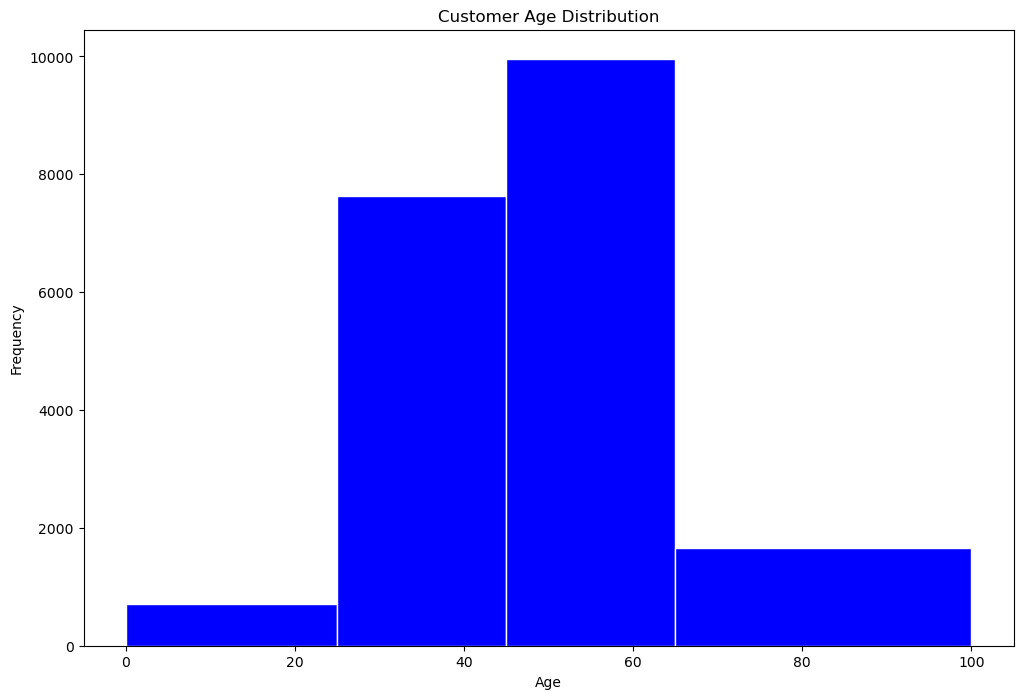

In [46]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(customer_all['Age'], color = 'blue', edgecolor = 'white', bins=[0,25,45,65,100])
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('customer_age_distribution.png')

plt.show()


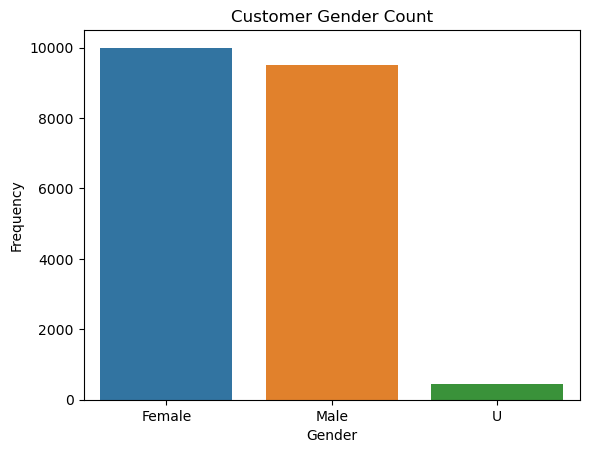

In [60]:
sns.countplot(x = 'gender',  data = customer_all)
plt.title('Customer Gender Count')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('customer_gender_distribution.png')

plt.show()

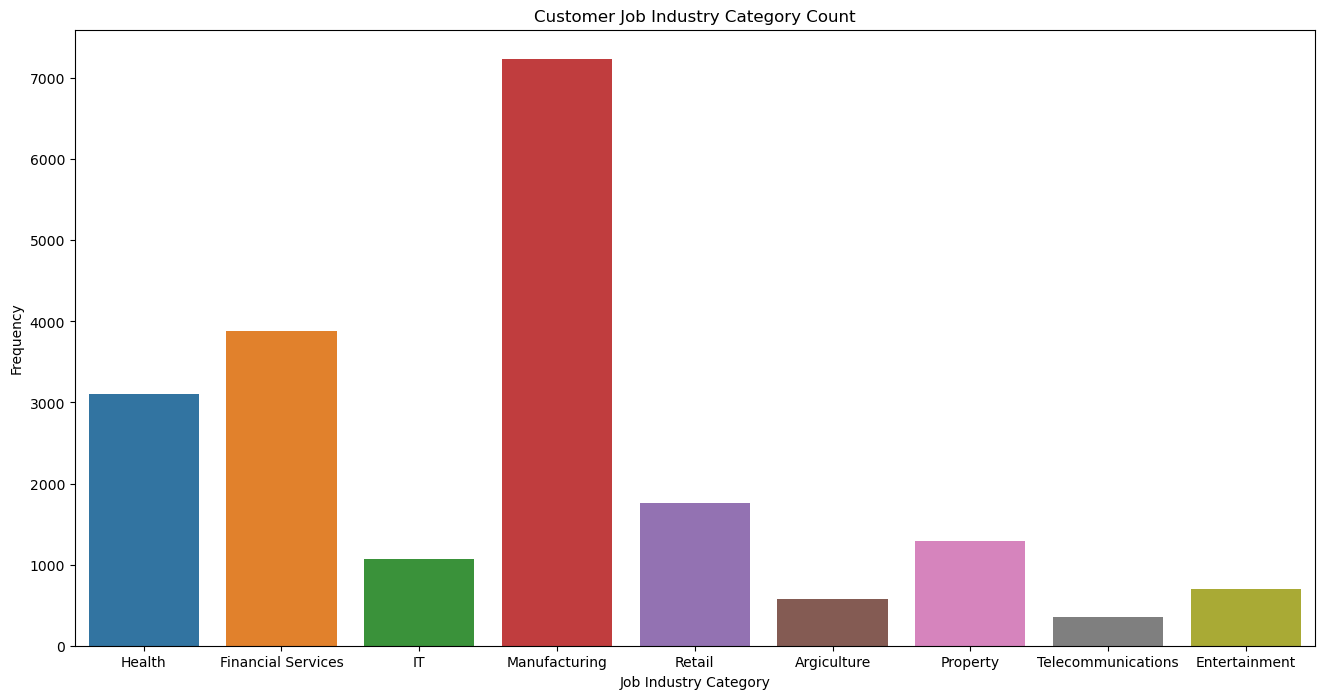

In [61]:
plt.figure(figsize = (16,8))
sns.countplot(x= 'job_industry_category', data = customer_all)
plt.title('Customer Job Industry Category Count')
plt.xlabel('Job Industry Category')
plt.ylabel('Frequency')

plt.savefig('customer_job_industry_distribution.png')

plt.show()

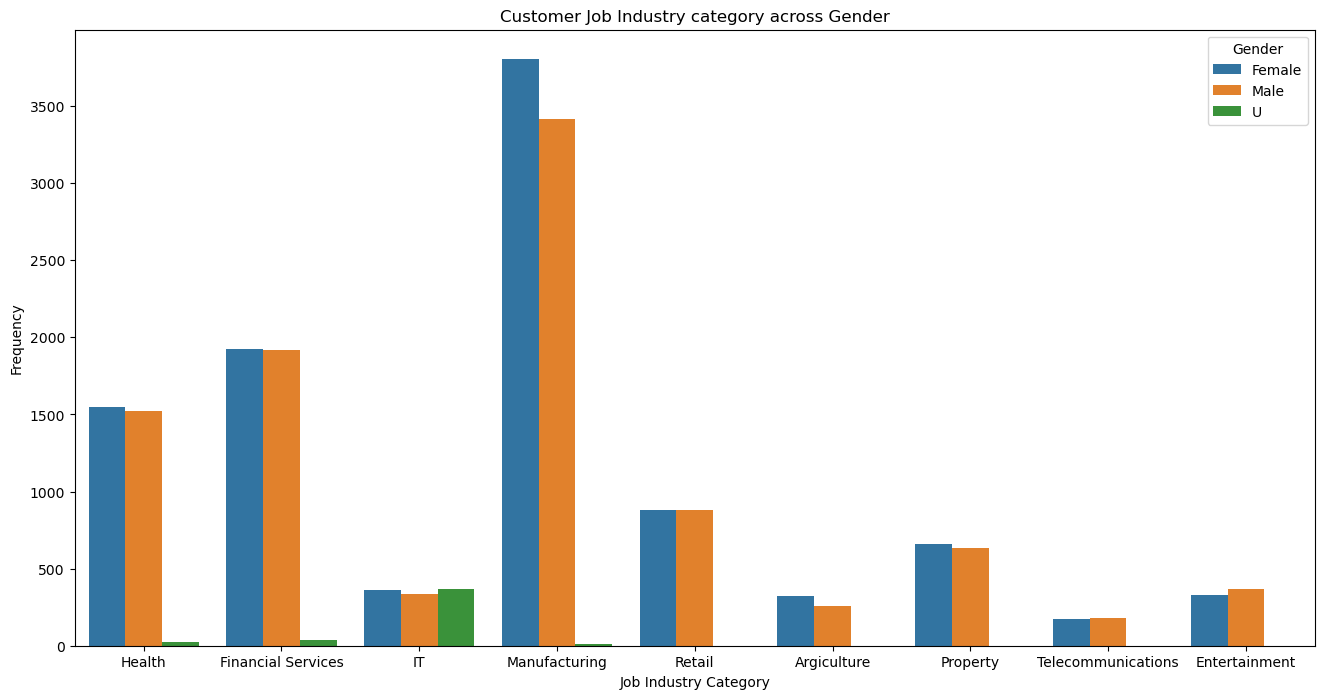

In [62]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data=customer_all, hue='gender')
plt.legend(title='Gender', loc='upper right')
plt.title('Customer Job Industry category across Gender')
plt.xlabel('Job Industry Category')
plt.ylabel('Frequency')

plt.savefig('customer_job_industry_gender_distribution.png')

plt.show()

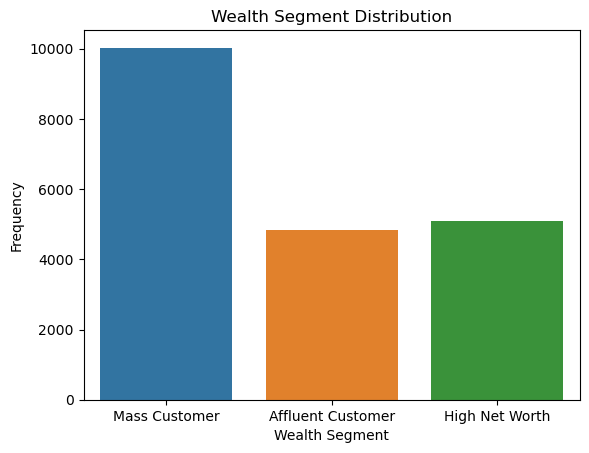

In [69]:
sns.countplot(x = 'wealth_segment', data = customer_all)
plt.title('Wealth Segment Distribution')
plt.xlabel('Wealth Segment')
plt.ylabel('Frequency')

plt.savefig('customer_wealth_segment_distribution.png')

plt.show()

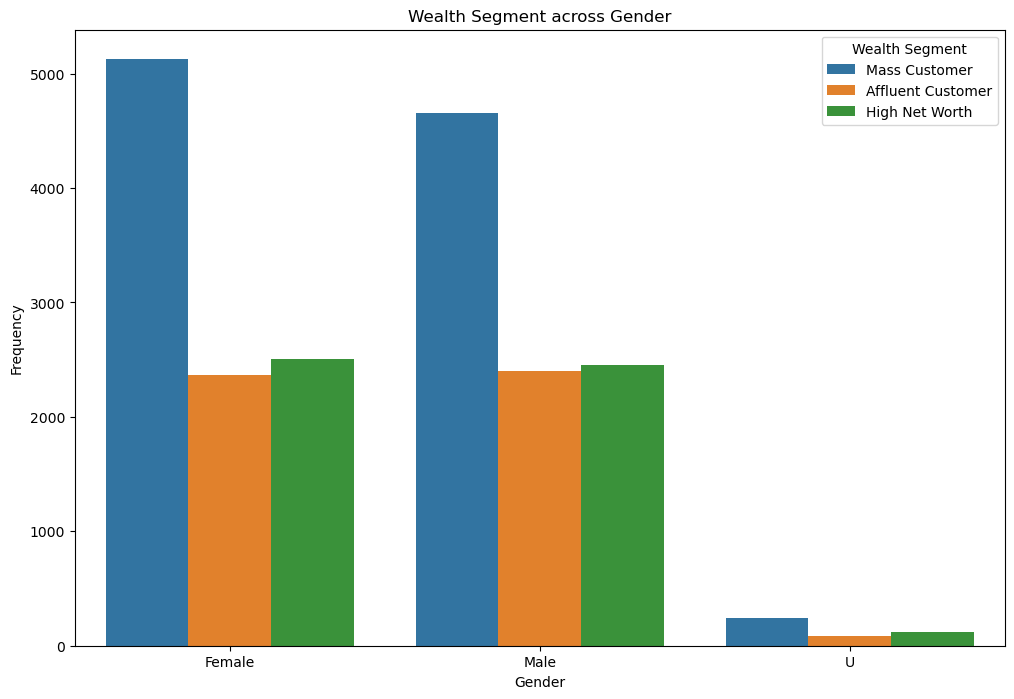

In [82]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', data=customer_all, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right')
plt.title('Wealth Segment across Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('customer_wealth_gender_distribution.png')

plt.show()

<Figure size 1600x800 with 0 Axes>

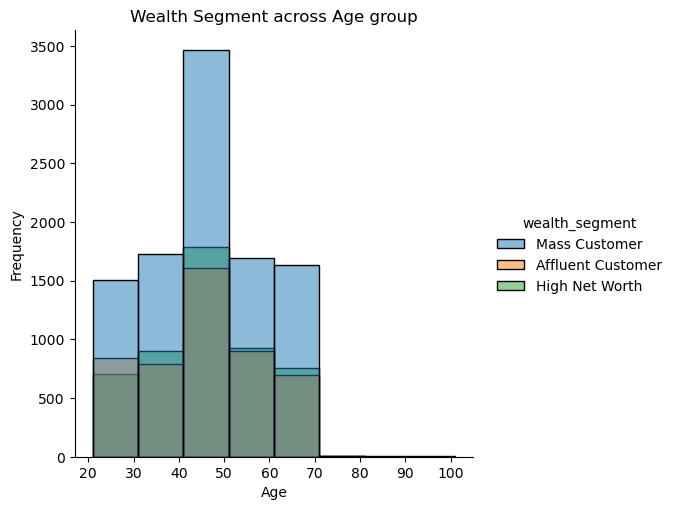

In [85]:
plt.figure(figsize = (16,8))
sns.displot(x='Age', binwidth=10, data=customer_all, hue='wealth_segment')
plt.title('Wealth Segment across Age group')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('customer_wealth_age_distribution.png')

plt.show()


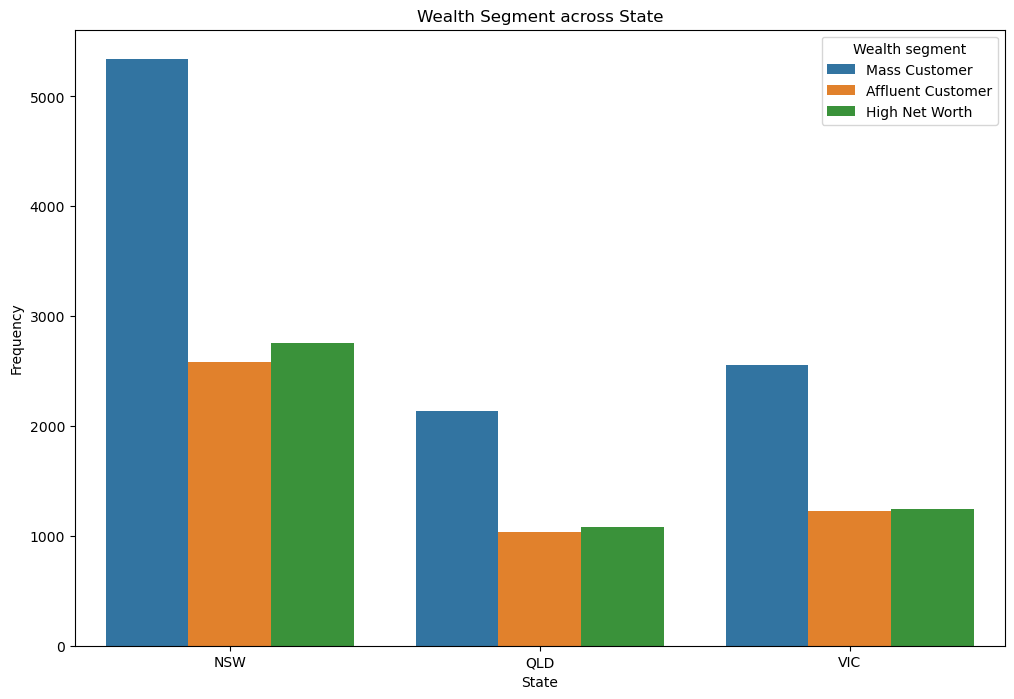

In [87]:
plt.figure(figsize = (12,8))
sns.countplot(x='state', data=customer_all, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right')
plt.title('Wealth Segment across State')
plt.xlabel('State')
plt.ylabel('Frequency')

plt.savefig('customer_wealth_state_distribution.png')

plt.show()

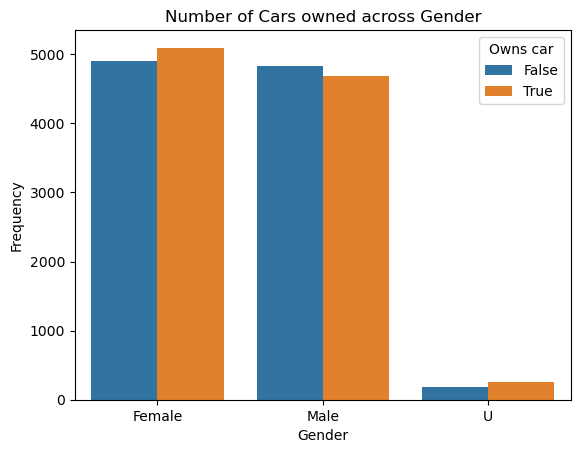

In [71]:
sns.countplot(x='gender', data=customer_all, hue='owns_car')
plt.legend(title='Owns car', loc='upper right')
plt.title('Number of Cars owned across Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('customer_cars_gender_distribution.png')

plt.show()

<Figure size 1600x800 with 0 Axes>

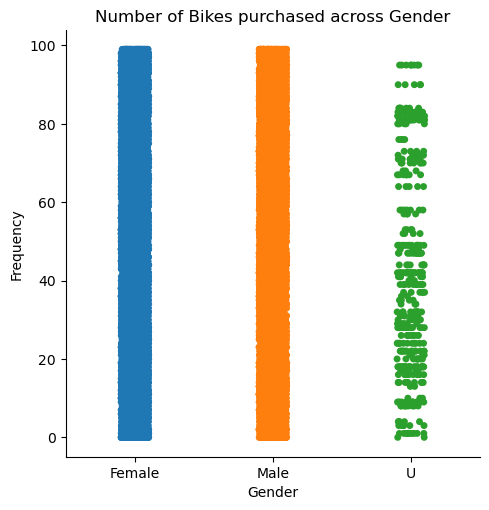

In [80]:
plt.figure(figsize = (16,8))
sn.catplot(data=customer_all, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number of Bikes purchased across Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('customer_bike_gender_distribution.png')

plt.show()
 #Need to replot

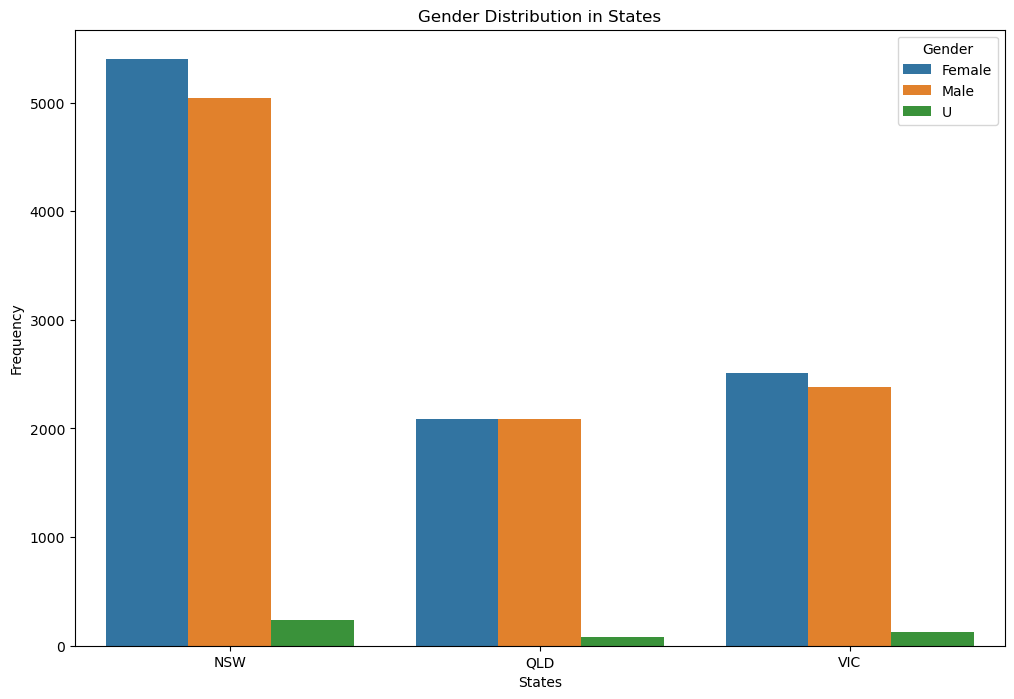

In [91]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = customer_all, hue = 'gender')
plt.legend(title='Gender', loc='upper right')
plt.title('Gender Distribution in States')
plt.xlabel('States')
plt.ylabel('Frequency')

plt.savefig('customer_state_gender_distribution.png')

plt.show()

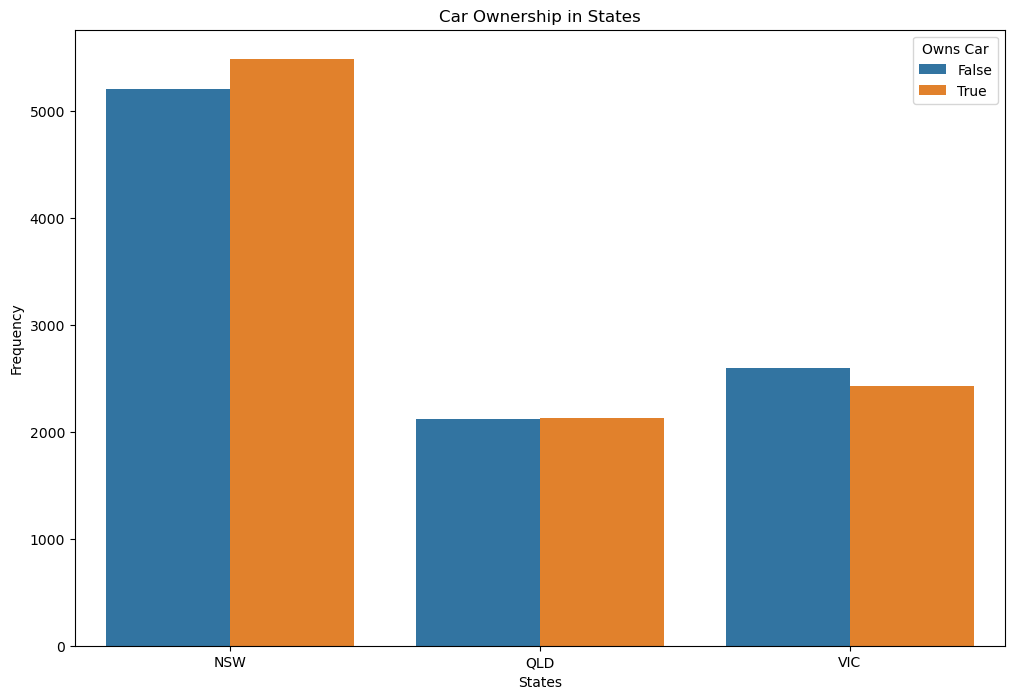

In [95]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = customer_all, hue = 'owns_car')
plt.legend(title='Owns Car', loc='upper right')
plt.title('Car Ownership in States')
plt.xlabel('States')
plt.ylabel('Frequency')

plt.savefig('customer_car_state_dist.png')

plt.show()

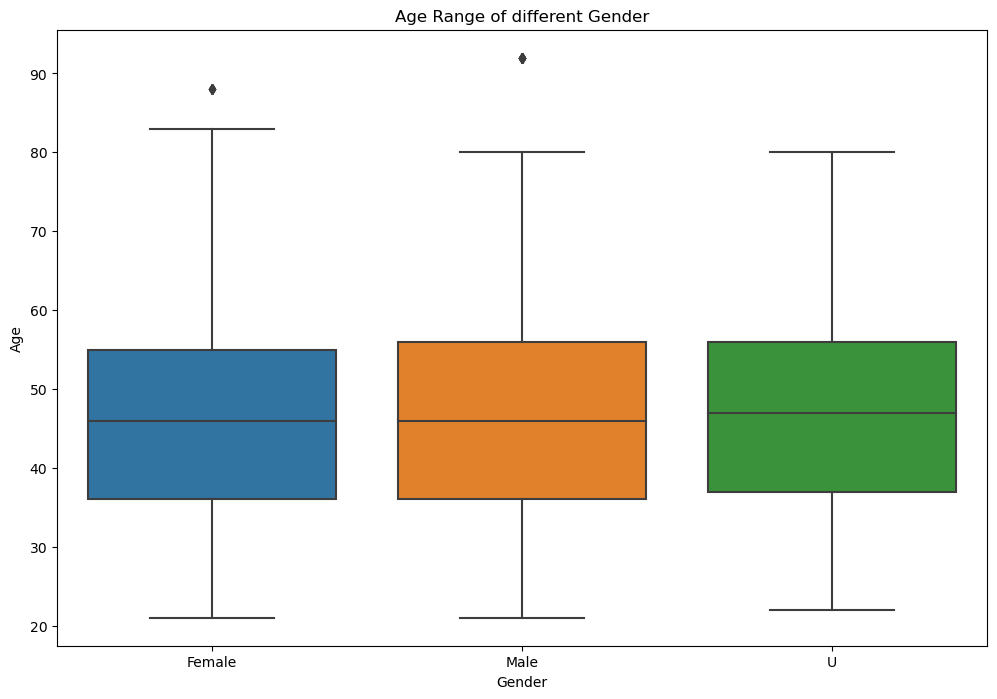

In [97]:
plt.figure(figsize = (12,8))
sns.boxplot(x = customer_all['gender'], y = customer_all['Age'])
plt.title('Age Range of different Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.savefig('customer_gender_age_dist.png')

plt.show()

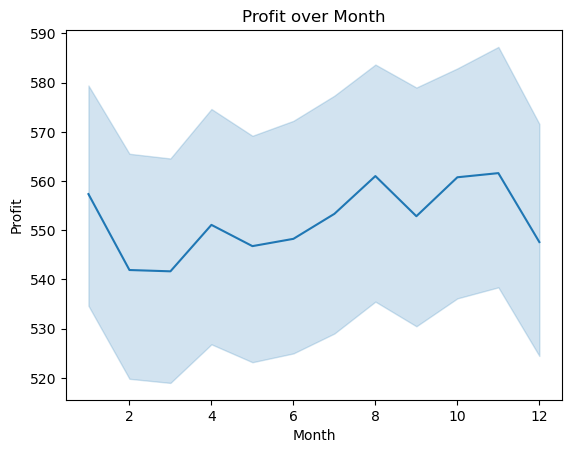

In [113]:
sns.lineplot(y=customer_all['profit'], x=customer_all['transaction_month'] )
plt.title('Profit over Month')
plt.xlabel('Month')
plt.ylabel('Profit')

plt.savefig('profit_month_dist.png')

plt.show()

In [114]:
new_customer = csv4

In [115]:
new_customer

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [116]:
new_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  983 non-null    object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [117]:
new_customer.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,rank,value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881722
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293550
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649500
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.719000


In [118]:
new_customer.isnull().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
dob                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
rank                                    0
value                                   0
dtype: int64

In [119]:
new_customer['dob'].fillna(method='ffill', inplace = True)

In [120]:
new_customer.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
rank                                   0
value                                  0
dtype: int64

In [121]:
new_customer['dob'] = pd.to_datetime(new_customer['dob'])

In [123]:
ref_date_new = dt.datetime.now()
new_customer['Age'] = new_customer['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date_new, freq = 'Y')))

In [124]:
new_customer

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,64
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,22
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,69
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,71


In [125]:
new_customer =  new_customer[new_customer.Age < 100]

In [126]:
new_customer

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,66
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,53
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703,44
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,64
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,22
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,69
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,71


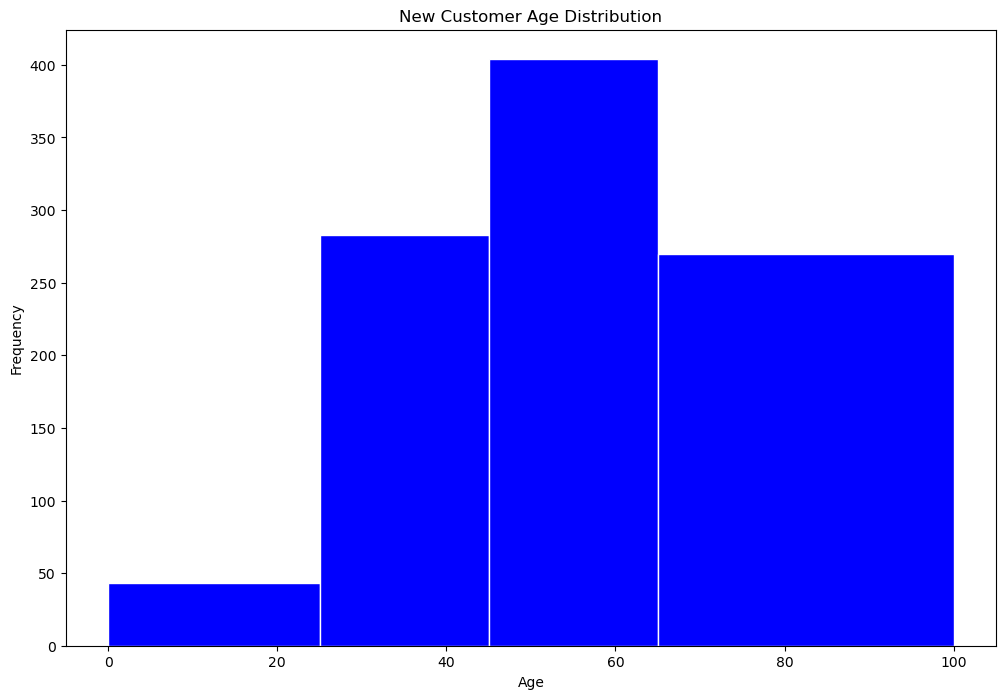

In [127]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(new_customer['Age'], color = 'blue', edgecolor = 'white', bins=[0,25,45,65,100])
plt.title('New Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('new_customer_age_distribution.png')

plt.show()


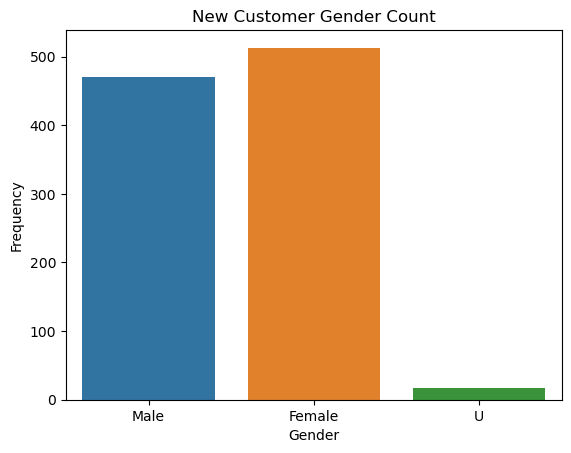

In [128]:
sns.countplot(x = 'gender',  data = new_customer)
plt.title('New Customer Gender Count')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('new_customer_gender_distribution.png')

plt.show()

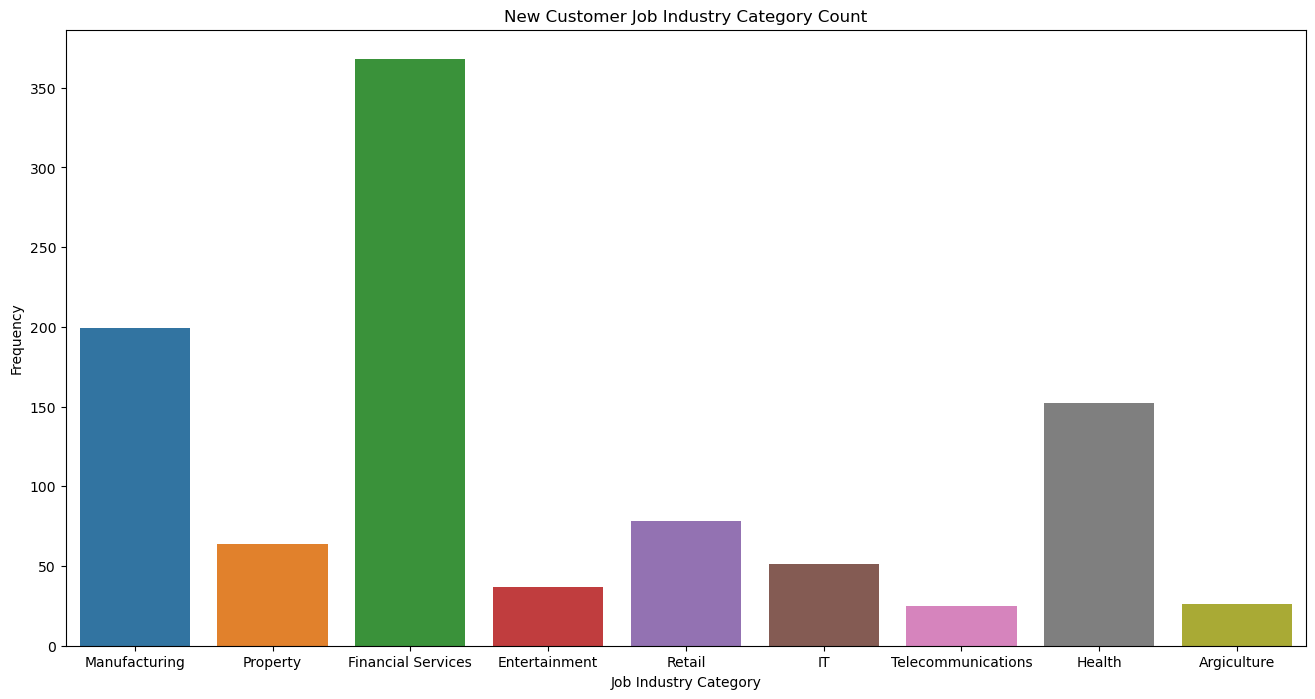

In [129]:
plt.figure(figsize = (16,8))
sns.countplot(x= 'job_industry_category', data = new_customer)
plt.title('New Customer Job Industry Category Count')
plt.xlabel('Job Industry Category')
plt.ylabel('Frequency')

plt.savefig('new_customer_job_industry_distribution.png')

plt.show()

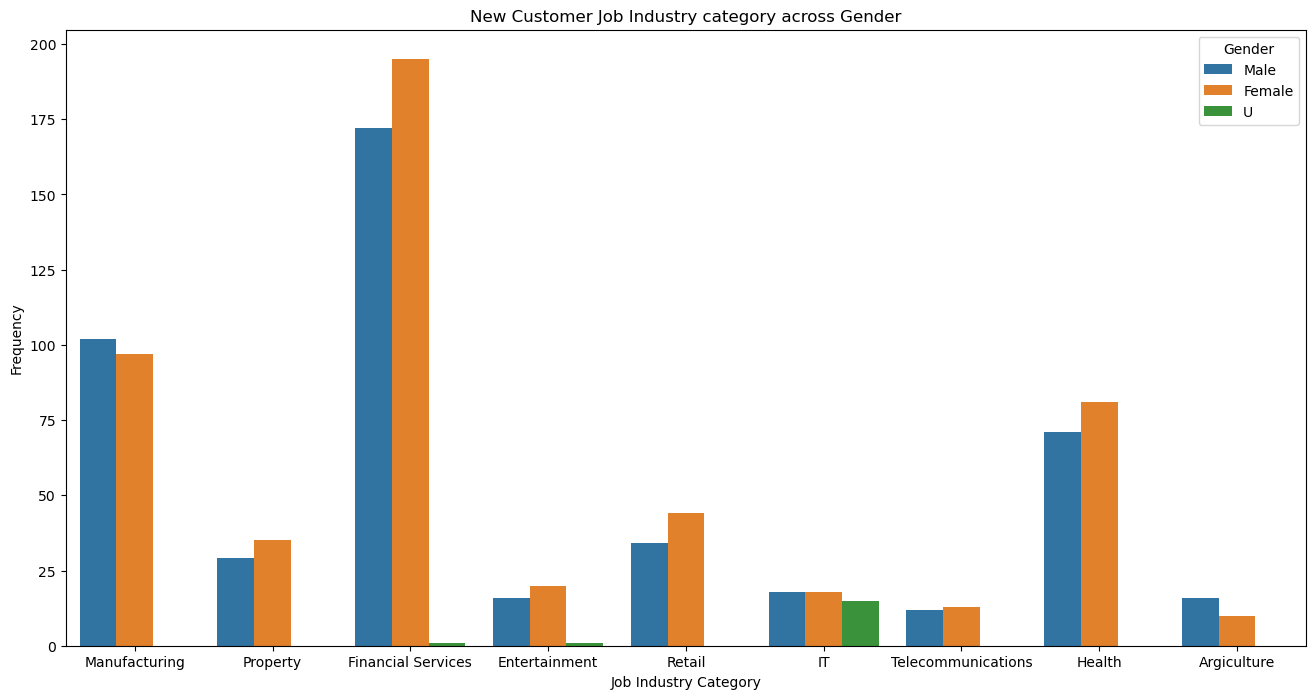

In [130]:
plt.figure(figsize = (16,8))
sns.countplot(x='job_industry_category', data=new_customer, hue='gender')
plt.legend(title='Gender', loc='upper right')
plt.title('New Customer Job Industry category across Gender')
plt.xlabel('Job Industry Category')
plt.ylabel('Frequency')

plt.savefig('new_customer_job_industry_gender_distribution.png')

plt.show()

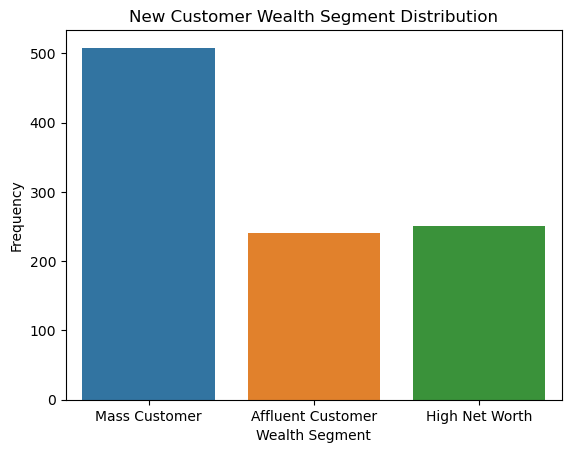

In [131]:
sns.countplot(x = 'wealth_segment', data = new_customer)
plt.title('New Customer Wealth Segment Distribution')
plt.xlabel('Wealth Segment')
plt.ylabel('Frequency')

plt.savefig('new_customer_wealth_segment_distribution.png')

plt.show()

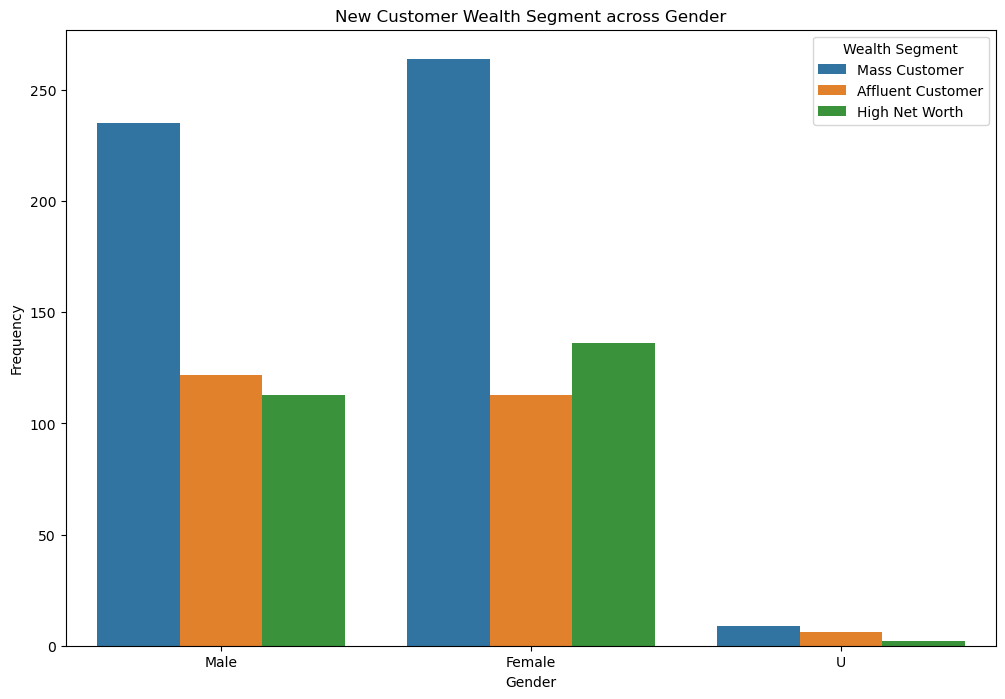

In [132]:
plt.figure(figsize = (12,8))
sns.countplot(x='gender', data=new_customer, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right')
plt.title('New Customer Wealth Segment across Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('new_customer_wealth_gender_distribution.png')

plt.show()

<Figure size 1600x800 with 0 Axes>

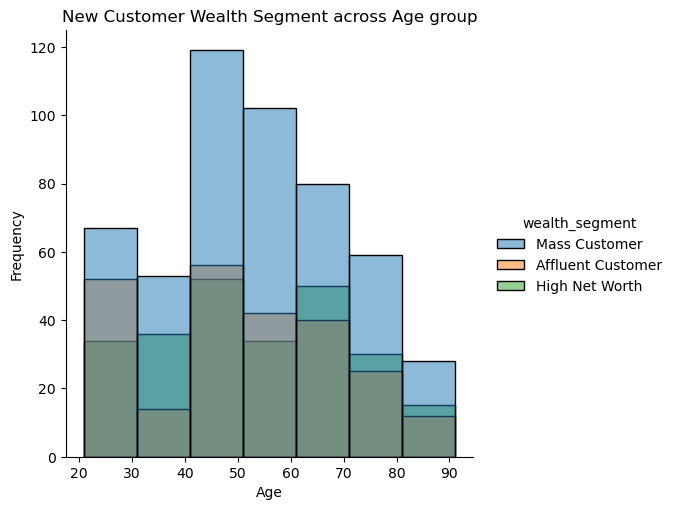

In [133]:
plt.figure(figsize = (16,8))
sns.displot(x='Age', binwidth=10, data=new_customer, hue='wealth_segment')
plt.title('New Customer Wealth Segment across Age group')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.savefig('new_customer_wealth_age_distribution.png')

plt.show()

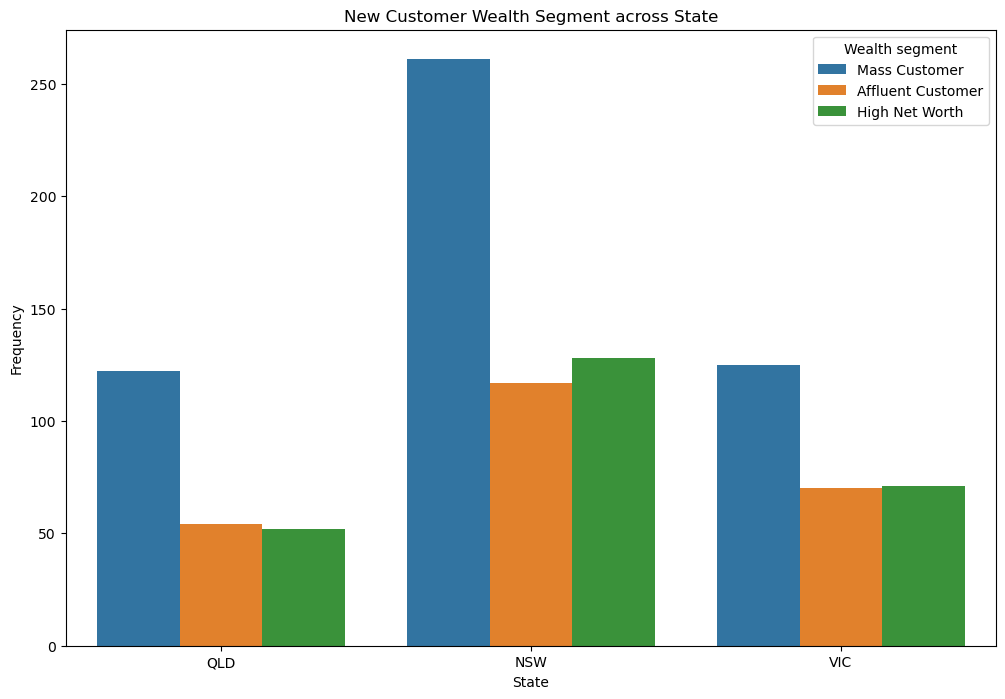

In [134]:
plt.figure(figsize = (12,8))
sns.countplot(x='state', data=new_customer, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right')
plt.title('New Customer Wealth Segment across State')
plt.xlabel('State')
plt.ylabel('Frequency')

plt.savefig('new_customer_wealth_state_distribution.png')

plt.show()

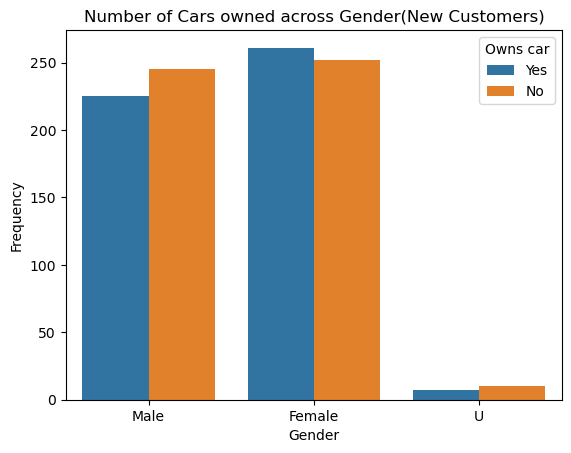

In [135]:
sns.countplot(x='gender', data=new_customer, hue='owns_car')
plt.legend(title='Owns car', loc='upper right')
plt.title('Number of Cars owned across Gender(New Customers)')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('new_customer_cars_gender_distribution.png')

plt.show()

<Figure size 1600x800 with 0 Axes>

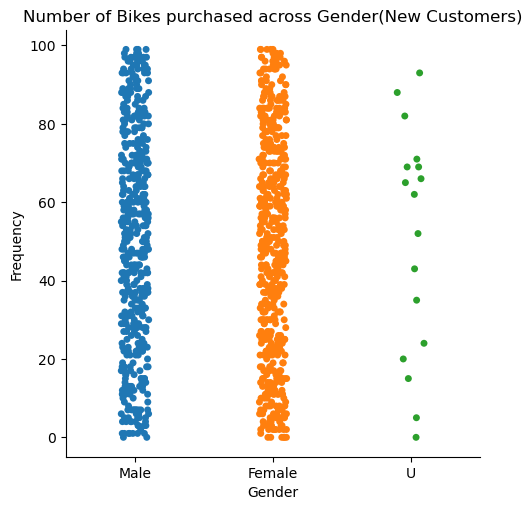

In [136]:
plt.figure(figsize = (16,8))
sn.catplot(data=new_customer, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number of Bikes purchased across Gender(New Customers)')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.savefig('new_customer_bike_gender_distribution.png')

plt.show()
 #Need to replot

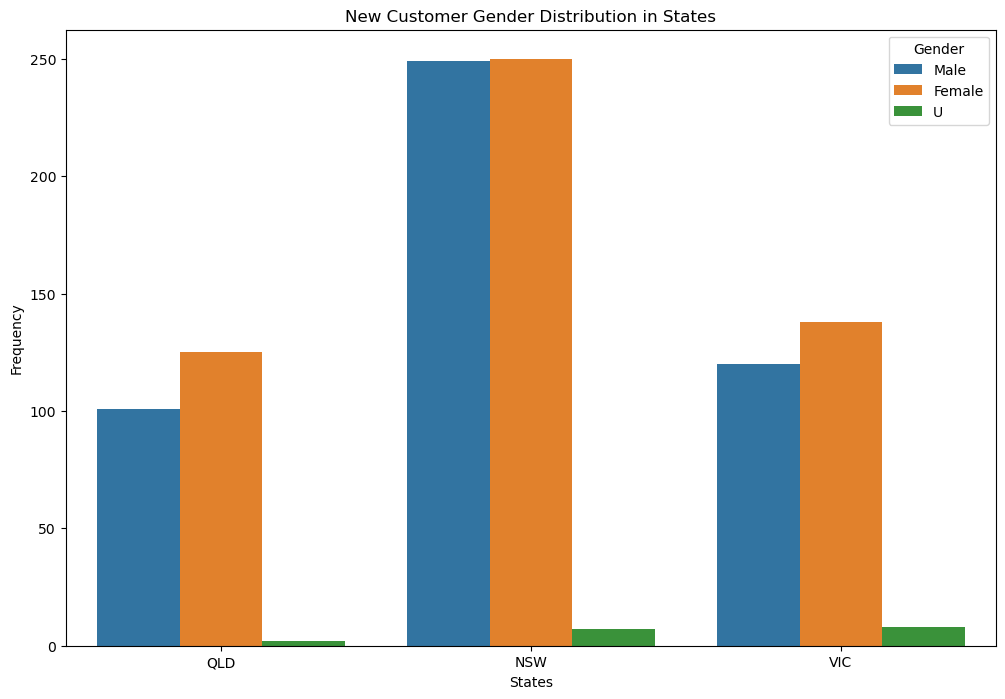

In [137]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = new_customer, hue = 'gender')
plt.legend(title='Gender', loc='upper right')
plt.title('New Customer Gender Distribution in States')
plt.xlabel('States')
plt.ylabel('Frequency')

plt.savefig('new_customer_state_gender_distribution.png')

plt.show()

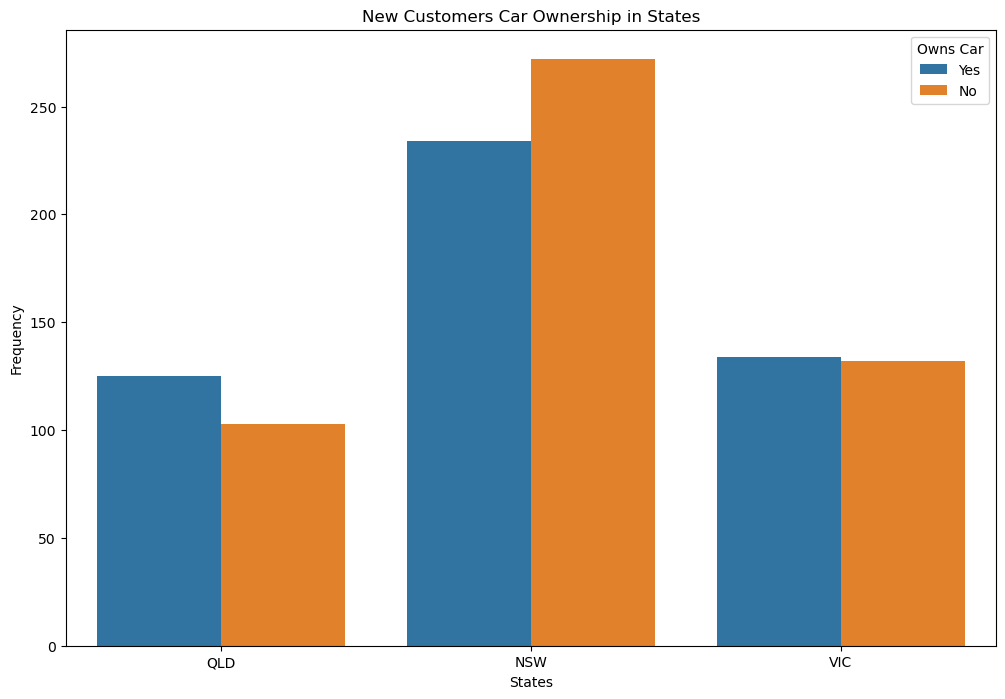

In [138]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'state', data = new_customer, hue = 'owns_car')
plt.legend(title='Owns Car', loc='upper right')
plt.title('New Customers Car Ownership in States')
plt.xlabel('States')
plt.ylabel('Frequency')

plt.savefig('new_customer_car_state_dist.png')

plt.show()

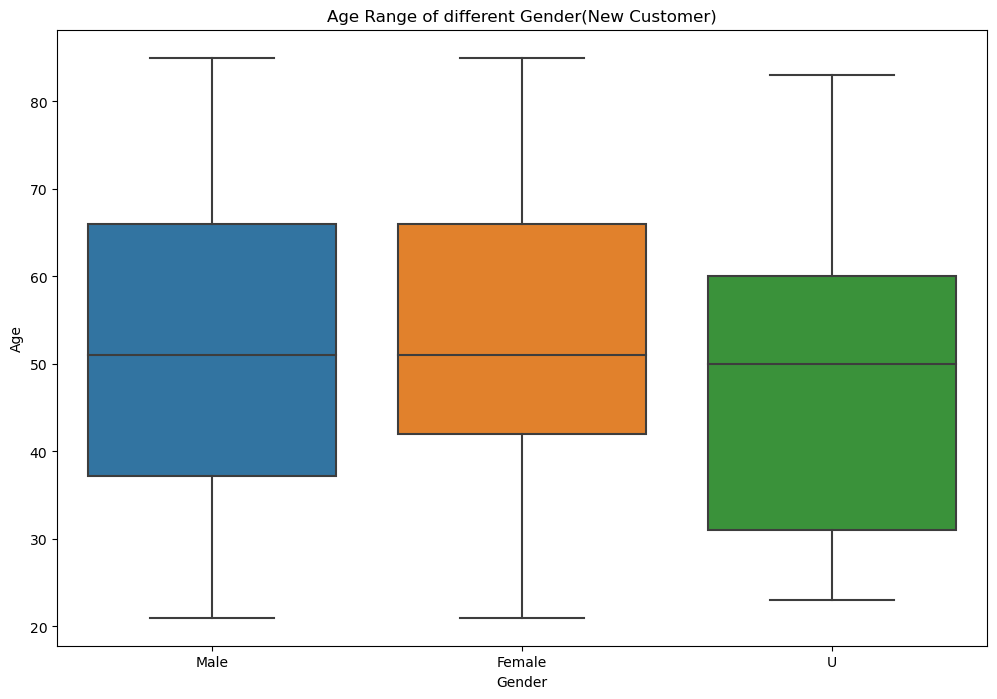

In [139]:
plt.figure(figsize = (12,8))
sns.boxplot(x = new_customer['gender'], y = new_customer['Age'])
plt.title('Age Range of different Gender(New Customer)')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.savefig('new_customer_gender_age_dist.png')

plt.show()

In [142]:
#print the final file to excel ready to be used as a data source for dashboard
customer_all.to_excel('./current_customers_eda.xlsx', sheet_name='current_customers', index=False)
new_customer.to_excel('./new_customers_eda.xlsx', sheet_name='new_customer', index=False)